# Practice working with pymc3 and theano

In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import exoplanet as exo

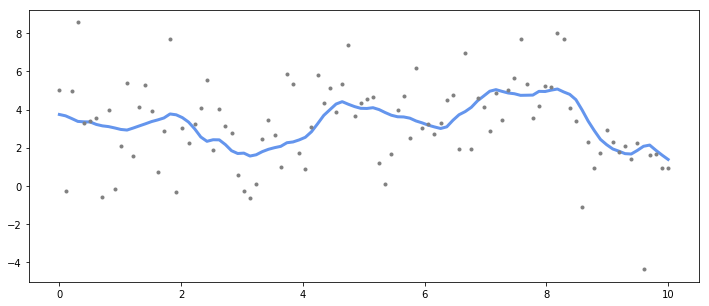

In [2]:
np.random.seed(123)

n = 100

# X must be a column vector
X = np.linspace(0, 10, n)[:, None]

ell_true = 1.0
eta_true = 3.0

# mean and covariance fxns
mean_func = pm.gp.mean.Zero()
cov_func  = eta_true**2 + pm.gp.cov.Matern32(1, ell_true)

# generate the data
f_true = np.random.multivariate_normal(mean_func(X).eval(), cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

sig_true = 2.0
y = f_true + sig_true*np.random.randn(n)


fig = plt.figure(figsize=(12,5))
plt.plot(X, f_true, c='cornflowerblue', lw=3)
plt.plot(X, y, '.', c='grey')
plt.show()


In [3]:
with pm.Model() as model:
    ell = pm.Gamma('ell', alpha=2, beta=1)
    eta = pm.HalfCauchy('eta', beta=5)
    
    cov = eta**2 + pm.gp.cov.Matern32(1, ell)
    gp = pm.gp.Marginal(cov_func=cov)
    
    sig = pm.HalfCauchy('sig', beta=5)
    y_ = gp.marginal_likelihood('y_', X=X, y=y, noise=sig)
    
with model:
    map_soln = exo.optimize(start=model.test_point)

/Users/research/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/research/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/Users/research/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future thi

{'ell_log__': array(-0.12477252),
 'eta_log__': array(1.31674892),
 'sig_log__': array(0.68159527),
 'ell': array(0.88269768),
 'eta': array(3.73127096),
 'sig': array(1.97702912)}